<a href="https://colab.research.google.com/github/harsh903/Other-projects/blob/main/Breast_cancer_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library and data reading

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/miller2005_public_clinicalMatrix.txt',delimiter = "\t")
df.head()

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,_INTEGRATION,_PATIENT,p53DLDAclassResult,p53mutant,_GENOMIC_ID_miller2005
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,X100B08,X100B08,WT-like,p53-,X100B08
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,X101B88,X101B88,MT-like,p53+,X101B88
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,X102B06,X102B06,MT-like,p53+,X102B06
3,X103B41,52,Yes,NaN,NaN,ER-,G3,LN+,PgR-,22.0,X103B41,X103B41,MT-like,p53-,X103B41
4,X104B91,80,Yes,AliveOrCensored,4.0,ER+,G3,NaN,PgR+,24.0,X104B91,X104B91,WT-like,p53+,X104B91


**`EDA`**

In [ ]:
df.drop(["_GENOMIC_ID_miller2005"], axis = 1, inplace=True)
df.drop(["_INTEGRATION"], axis = 1, inplace=True)
df.drop(["_PATIENT"], axis = 1, inplace=True)
df.drop(["sampleID"], axis = 1, inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['EistonHistologicGrade']= label_encoder.fit_transform(df['EistonHistologicGrade'])
df['EistonHistologicGrade'].unique()

array([0, 2, 1, 3])

In [ ]:
df.rename(columns = {'DSS.time':'Dss'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AgeAtDiagnosis         251 non-null    int64  
 1   DLDAerror              251 non-null    object 
 2   DSS                    236 non-null    object 
 3   Dss                    236 non-null    float64
 4   ERstatus               247 non-null    object 
 5   EistonHistologicGrade  249 non-null    object 
 6   LymphNodeStatus        242 non-null    object 
 7   PgRstatus              251 non-null    object 
 8   TumorSize              251 non-null    float64
 9   p53DLDAclassResult     251 non-null    object 
 10  p53mutant              251 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 21.7+ KB


In [ ]:
df.columns

Index(['AgeAtDiagnosis', 'DLDAerror', 'DSS', 'Dss', 'ERstatus',
       'EistonHistologicGrade', 'LymphNodeStatus', 'PgRstatus', 'TumorSize',
       'p53DLDAclassResult', 'p53mutant'],
      dtype='object')

In [ ]:
df.describe()

,AgeAtDiagnosis,Dss,TumorSize
count,251.000000,236.000000,251.000000
mean,62.111554,8.211864,22.428287
std,13.866056,3.857795,12.533053
min,28.000000,0.000000,2.000000
25%,52.000000,5.000000,15.000000
50%,64.000000,10.000000,20.000000
75%,72.000000,11.000000,25.625000
max,93.000000,13.000000,130.000000


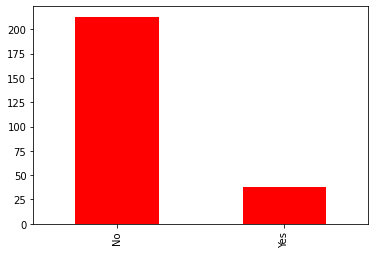

In [ ]:
df['DLDAerror'].value_counts().plot(kind='bar', color = 'r')

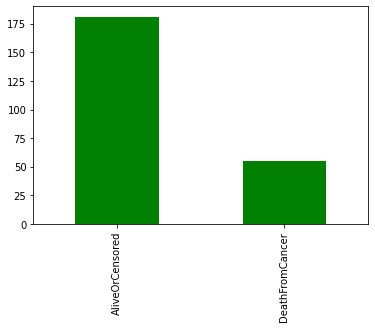

In [ ]:
df['DSS'].value_counts().plot(kind='bar', color = 'g')

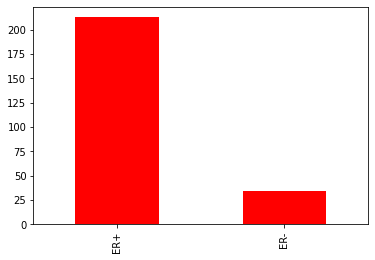

In [ ]:
df['ERstatus'].value_counts().plot(kind='bar', color = 'r')

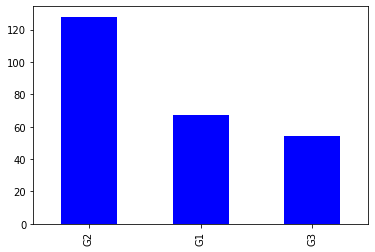

In [ ]:
df['EistonHistologicGrade'].value_counts().plot(kind='bar', color = 'b')

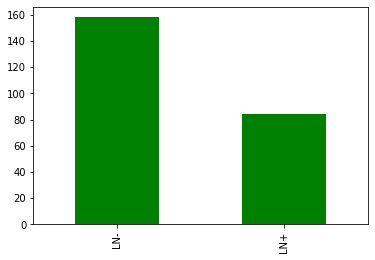

In [ ]:
df['LymphNodeStatus'].value_counts().plot(kind='bar', color = 'g')

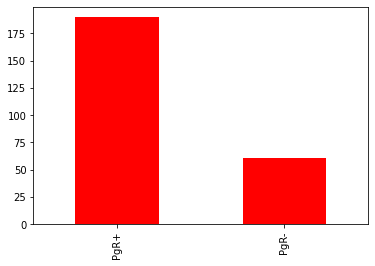

In [ ]:
df['PgRstatus'].value_counts().plot(kind='bar', color = 'r')

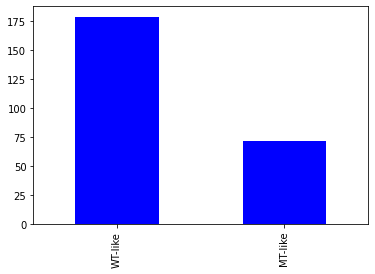

In [ ]:
df['p53DLDAclassResult'].value_counts().plot(kind='bar', color = 'b')

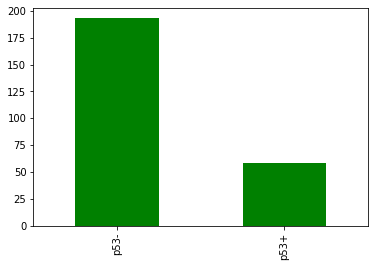

In [ ]:
df['p53mutant'].value_counts().plot(kind='bar', color = 'g')

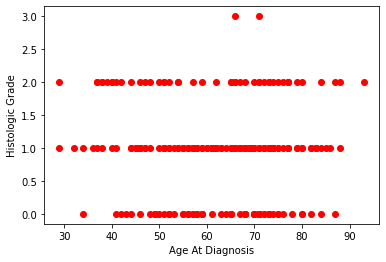

In [ ]:
x = df.AgeAtDiagnosis
y = df.EistonHistologicGrade
plt.scatter(x, y, c ="red")
plt.xlabel("Age At Diagnosis")
plt.ylabel("Histologic Grade")
plt.show()

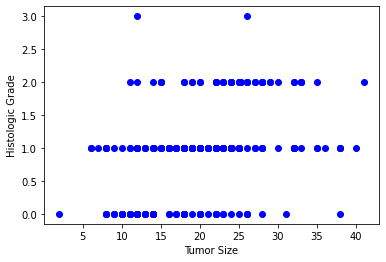

In [ ]:
x = df.TumorSize
y = df.EistonHistologicGrade
plt.scatter(x, y, c ="blue")
plt.xlabel("Tumor Size")
plt.ylabel("Histologic Grade")
plt.show()

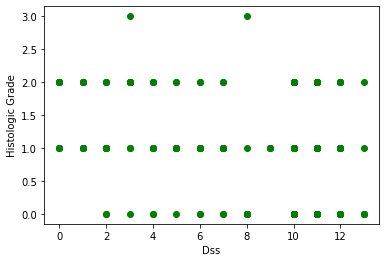

In [ ]:
x = df.Dss
y = df.EistonHistologicGrade
plt.scatter(x, y, c ="green")
plt.xlabel("Dss")
plt.ylabel("Histologic Grade")
plt.show()

Feature Engineering

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


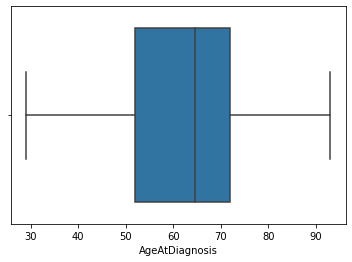

In [ ]:
sns.boxplot(df.AgeAtDiagnosis)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


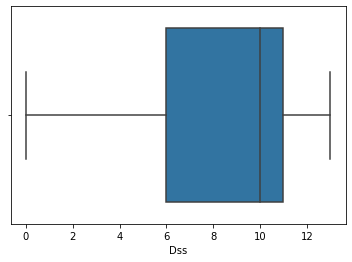

In [ ]:
sns.boxplot(df.Dss)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


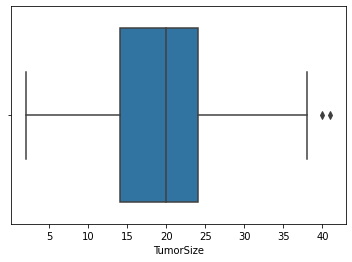

In [ ]:
sns.boxplot(df.TumorSize)
plt.show()

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [ ]:
df_outlier_removed=remove_outlier_IQR(df.TumorSize)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


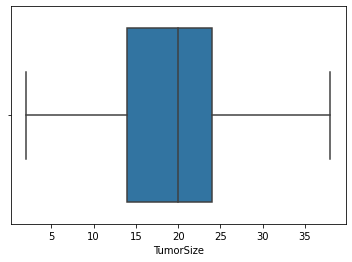

In [ ]:
sns.boxplot(df.TumorSize)
plt.show()

In [ ]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['DSS']= label_encoder.fit_transform(df['DSS'])
df['DSS'].unique()

array([0, 2, 1])

In [ ]:
df.ERstatus = [1 if i == "ER+" else 0 for i in df.ERstatus]

In [ ]:
df.LymphNodeStatus = [1 if i == "LN+" else 0 for i in df.LymphNodeStatus]

In [ ]:
df.PgRstatus = [1 if i == "PgR+" else 0 for i in df.PgRstatus]

In [ ]:
df.p53DLDAclassResult = [1 if i == "WT.like" else 0 for i in df.p53DLDAclassResult]

In [ ]:
df.p53mutant = [1 if i == "p53+" else 0 for i in df.p53mutant]

In [ ]:
df.DLDAerror = [1 if i == "Yes" else 0 for i in df.DLDAerror]

In [ ]:
# Filling the null values using KnnImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

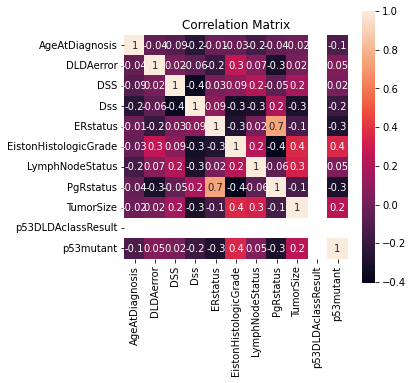

In [ ]:
f = plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot = True, fmt='.1g',square=True)

In [ ]:
df.drop(["p53DLDAclassResult"], axis = 1, inplace=True)

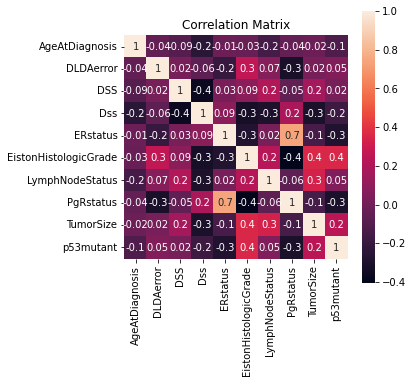

In [ ]:
f = plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot = True, fmt='.1g',square=True)

Feature scaling

In [ ]:
x = df.drop(["EistonHistologicGrade"], axis = 1)
y = df["EistonHistologicGrade"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8
0,0.609375,0.0,0.0,0.923077,1.0,0.0,0.0,0.194444,0.0
1,0.171875,0.0,0.0,0.923077,0.0,0.0,0.0,0.277778,1.0
2,0.343750,0.0,0.0,0.923077,1.0,0.0,1.0,0.666667,1.0
3,0.359375,1.0,1.0,0.846154,0.0,1.0,0.0,0.555556,0.0
4,0.796875,1.0,0.0,0.307692,1.0,0.0,1.0,0.611111,1.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

Model

In [ ]:
# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)
y_pred0 = model.predict(x_test)

In [ ]:
y_pred0

array([0., 1., 1., 1., 0., 1., 2., 1., 2., 2., 1., 1., 0., 1., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1., 1.])

In [ ]:
matrix0 = confusion_matrix(y_test, y_pred1)
print(matrix0)

[[ 4  8  3]
 [ 8 11  6]
 [ 2  2  3]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


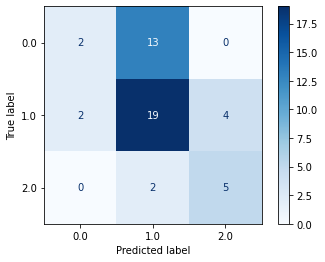

In [ ]:
disp = plot_confusion_matrix(model, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred0, digits=3))

              precision    recall  f1-score   support

         0.0      0.500     0.133     0.211        15
         1.0      0.559     0.760     0.644        25
         2.0      0.556     0.714     0.625         7

    accuracy                          0.553        47
   macro avg      0.538     0.536     0.493        47
weighted avg      0.540     0.553     0.503        47



In [ ]:
# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred1 = knn.predict(x_test)

In [ ]:
y_pred1

array([0., 0., 1., 1., 0., 1., 2., 0., 2., 1., 0., 1., 2., 0., 0., 0., 2.,
       1., 1., 1., 1., 2., 0., 1., 2., 2., 1., 2., 2., 2., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 2., 1., 0.])

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
matrix = confusion_matrix(y_test, y_pred1)

In [ ]:
print(matrix)

[[ 6  8  1]
 [ 8 12  5]
 [ 1  1  5]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


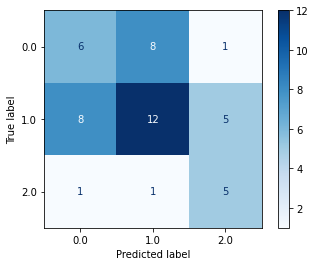

In [ ]:
disp = plot_confusion_matrix(knn, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred1, digits=3))

              precision    recall  f1-score   support

         0.0      0.400     0.400     0.400        15
         1.0      0.571     0.480     0.522        25
         2.0      0.455     0.714     0.556         7

    accuracy                          0.489        47
   macro avg      0.475     0.531     0.492        47
weighted avg      0.499     0.489     0.488        47



In [ ]:
# SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)

In [ ]:
y_pred2

array([1., 1., 1., 1., 0., 1., 2., 1., 2., 2., 1., 1., 0., 1., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.])

In [ ]:
matrix1 = confusion_matrix(y_test, y_pred1)
print(matrix1)

[[ 6  8  1]
 [ 8 12  5]
 [ 1  1  5]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


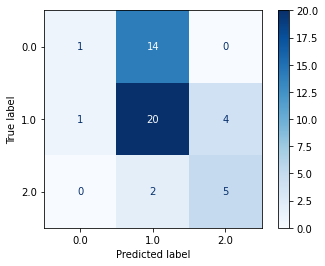

In [ ]:
disp = plot_confusion_matrix(clf, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred2, digits=3))

              precision    recall  f1-score   support

         0.0      0.500     0.067     0.118        15
         1.0      0.556     0.800     0.656        25
         2.0      0.556     0.714     0.625         7

    accuracy                          0.553        47
   macro avg      0.537     0.527     0.466        47
weighted avg      0.538     0.553     0.479        47



In [ ]:
# Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
y_pred3=clf1.predict(x_test)

In [ ]:
y_pred3

array([0., 2., 1., 1., 1., 1., 1., 1., 2., 1., 0., 1., 0., 0., 1., 0., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 0.])

In [ ]:
matrix3 = confusion_matrix(y_test, y_pred3)
print(matrix3)

[[ 4 11  0]
 [ 5 18  2]
 [ 0  1  6]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


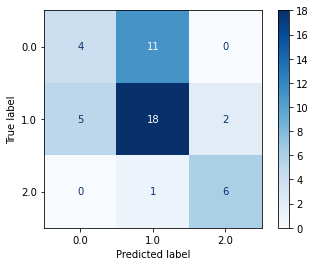

In [ ]:
disp = plot_confusion_matrix(clf1, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred3, digits=3))

              precision    recall  f1-score   support

         0.0      0.444     0.267     0.333        15
         1.0      0.600     0.720     0.655        25
         2.0      0.750     0.857     0.800         7

    accuracy                          0.596        47
   macro avg      0.598     0.615     0.596        47
weighted avg      0.573     0.596     0.574        47

